In [1]:
cat("INSTRUMENTAL VARIABLES")

INSTRUMENTAL VARIABLES

In [2]:
cat("

🎯 What Are Instrumental Variables?

Instrumental Variables (IV) are a causal inference method used when the treatment is not randomly assigned and 
there is unmeasured confounding you cannot control for.

🔥 The Core Idea

You find a variable Z (the instrument) that:

1. Affects the treatment (Z → W)

The instrument must change whether someone receives the treatment.

2. Does NOT directly affect the outcome (Z ↛ Y)

It should affect the outcome only through the treatment.

3. Is NOT related to confounders

Z must be as good as random with respect to unmeasured confounders.

📦 Why Use IV?

When we cannot rely on:

matching

regression

causal forests

uplift modeling

propensity scores

because confounders are unobserved.

→ IV is a way to “recover randomization.”

🧠 Intuition (the elevator pitch)

The Instrument works like a natural experiment.

If something (Z) pushes people into treatment in a random-like way,

but does not affect the outcome directly,

we can use it to identify the causal effect.

")



🎯 What Are Instrumental Variables?

Instrumental Variables (IV) are a causal inference method used when the treatment is not randomly assigned and 
there is unmeasured confounding you cannot control for.

🔥 The Core Idea

You find a variable Z (the instrument) that:

1. Affects the treatment (Z → W)

The instrument must change whether someone receives the treatment.

2. Does NOT directly affect the outcome (Z ↛ Y)

It should affect the outcome only through the treatment.

3. Is NOT related to confounders

Z must be as good as random with respect to unmeasured confounders.

📦 Why Use IV?

When we cannot rely on:

matching

regression

causal forests

uplift modeling

propensity scores

because confounders are unobserved.

→ IV is a way to “recover randomization.”

🧠 Intuition (the elevator pitch)

The Instrument works like a natural experiment.

If something (Z) pushes people into treatment in a random-like way,

but does not affect the outcome directly,

we can use it to identify the

In [3]:
cat("

✔️ Classic Example (Interview Ready)

🎵 Example: Effect of attending music lessons (W) on cognitive performance (Y)

Confounder:

Kids from wealthy families are more likely to take lessons AND have higher test scores.

You cannot measure family motivation, home environment, parenting skill, etc.

Use an Instrument:

Distance to nearest music school (Z)

Kids closer to a music school are more likely to attend (Z → W)

Distance does not directly improve math scores (Z ↛ Y)

Distance is unrelated to family motivation (ideally)

→ Valid IV.

")



✔️ Classic Example (Interview Ready)

🎵 Example: Effect of attending music lessons (W) on cognitive performance (Y)

Confounder:

Kids from wealthy families are more likely to take lessons AND have higher test scores.

You cannot measure family motivation, home environment, parenting skill, etc.

Use an Instrument:

Distance to nearest music school (Z)

Kids closer to a music school are more likely to attend (Z → W)

Distance does not directly improve math scores (Z ↛ Y)

Distance is unrelated to family motivation (ideally)

→ Valid IV.



In [4]:
cat("

🧩 How IV works mathematically

Two-Stage Least Squares (2SLS)

Stage 1: Predict treatment using the instrument

W = α + βZ + γX + ϵ

This gives the part of 𝑊^

Stage 2: Predict outcome using predicted treatment
𝑌 = 𝛿 + 𝜃 𝑊^ + 𝜂

The coefficient 𝜃 : θ = causal effect.

")

cat("

library(AER)

# Example data: ivreg requires formula Y ~ W | Z

iv_model <- ivreg(Y ~ W | Z, data = df)

summary(iv_model)

")




🧩 How IV works mathematically

Two-Stage Least Squares (2SLS)

Stage 1: Predict treatment using the instrument

W = α + βZ + γX + ϵ

This gives the part of 𝑊^

Stage 2: Predict outcome using predicted treatment
𝑌 = 𝛿 + 𝜃 𝑊^ + 𝜂

The coefficient 𝜃 : θ = causal effect.



library(AER)

# Example data: ivreg requires formula Y ~ W | Z

iv_model <- ivreg(Y ~ W | Z, data = df)

summary(iv_model)



In [5]:
cat("

The Two-Stage Least Squares (2SLS) method

")



The Two-Stage Least Squares (2SLS) method



In [6]:
cat("Examples :

| Setting                            | Treatment (T)              | Outcome (Y)    | Instrument (Z)                          |
| ---------------------------------- | -------------------------- | -------------- | --------------------------------------- |
| Education economics                | Years of education         | Income         | Distance to nearest college             |
| Health                             | Taking a drug              | Blood pressure | Doctor’s random prescription preference |
| Labor economics                    | Job training participation | Wage           | Random assignment or eligibility rule   |
| Genetics (Mendelian Randomization) | BMI                        | Heart disease  | Genetic variant (allele) affecting BMI  |

")

Examples :

| Setting                            | Treatment (T)              | Outcome (Y)    | Instrument (Z)                          |
| ---------------------------------- | -------------------------- | -------------- | --------------------------------------- |
| Education economics                | Years of education         | Income         | Distance to nearest college             |
| Health                             | Taking a drug              | Blood pressure | Doctor’s random prescription preference |
| Labor economics                    | Job training participation | Wage           | Random assignment or eligibility rule   |
| Genetics (Mendelian Randomization) | BMI                        | Heart disease  | Genetic variant (allele) affecting BMI  |



In [7]:
set.seed(123)
n <- 1000

U <- rnorm(n)
Z <- rnorm(n)                   # instrument
T <- 0.8*Z + 0.7*U + rnorm(n)   # treatment depends on Z (relevant) and U (confounded)
Y <- 5 + 2*T + 3*U + rnorm(n)   # outcome depends on T and U

head(U)
head(Z)
head(T)
head(Y)

# Ordinary regression (biased, because Cov(T,U)!=0)
ols <- lm(Y ~ T)
summary(ols)$coef

# Instrumental variable regression
library(AER)
iv <- ivreg(Y ~ T | Z)
summary(iv)

cat("\n :

| Term            | Estimate | Meaning                                                                                                                            | p-value | Significance           |
| --------------- | -------- | ----------------------------------------------------- |
| **(Intercept)** | 5.03     | When ( T = 0 ), the expected value of ( Y ) ≈ 5.0   
                             | < 2e–16 | *** highly significant |
| **T**           | **2.28** | A **1-unit increase in ( T )** causes, on average, 
                               a **2.28-unit increase in ( Y )**, 
                               after accounting for confounding using ( Z ) | < 2e–16 | 
                               *** highly significant |

| Metric                               | Meaning                                                                          | Value                      
| ------------------------------------ | -------------------------------------------------------------------------------- | --------------------------
| **Residual Std. Error = 2.96**       | Typical deviation of observed vs. predicted ( Y )                                | Moderate fit               
| **R² = 0.6846**                      | 68% of the variation in ( Y ) explained by fitted model                          | Strong explanatory power   
| **Wald test (F = 474.9, p < 2e–16)** | Tests whether the instrumented regressor ( T ) has a significant effect on ( Y ) | Highly significant overall 

✅ Summary in plain language :

After removing confounding effects using the instrument Z, 

we estimate that each 1-unit increase in the treatment T 
leads to an average increase of 2.28 units in the outcome 𝑌

This effect is statistically significant (p < 0.000001), 
and the model explains about 68% of the variation in 𝑌

")


[1] -0.56047565 -0.23017749  1.55870831  0.07050839  0.12928774  1.71506499

[1] -0.99579872 -1.03995504 -0.01798024 -0.13217513 -2.54934277  1.04057346

[1] -1.7005757 -0.7561504  0.5351225  1.1628434 -1.7748369  1.4177359

[1] -0.2328857  2.4694096  9.2982046  6.8399274  4.4366796 12.9432518

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.013457,0.08668492,57.83540,5.909025e-321
T,3.024533,0.05840893,51.78203,5.193491e-285


Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival




Call:
ivreg(formula = Y ~ T | Z)

Residuals:
     Min       1Q   Median       3Q      Max 
-8.60437 -1.97363  0.02301  1.86252  8.92073 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.0322     0.0935   53.82   <2e-16 ***
T             2.2801     0.1046   21.79   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.955 on 998 degrees of freedom
Multiple R-Squared: 0.6846,	Adjusted R-squared: 0.6843 
Wald test: 474.9 on 1 and 998 DF,  p-value: < 2.2e-16 



 :

| Term            | Estimate | Meaning                                                                                                                            | p-value | Significance           |
| --------------- | -------- | ----------------------------------------------------- |
| **(Intercept)** | 5.03     | When ( T = 0 ), the expected value of ( Y ) ≈ 5.0   
                             | < 2e–16 | *** highly significant |
| **T**           | **2.28** | A **1-unit increase in ( T )** causes, on average, 
                               a **2.28-unit increase in ( Y )**, 
                               after accounting for confounding using ( Z ) | < 2e–16 | 
                               *** highly significant |

| Metric                               | Meaning                                                                          | Value                      
| ------------------------------------ | ----------------------------------------------------------------------

In [8]:
cat('

2SLS: Two-Stage Least Squares

2SLS is an extension of OLS designed to fix endogeneity 

— using an instrumental variable (Z) that creates “as-if random” variation in T.


| Concept               | OLS                              | 2SLS                                        |
| --------------------- | -------------------------------- | ------------------------------------------- |
| Assumes exogeneity    | ✅ Yes                            | ✅ Yes, but via instrument                   |
| Handles confounding   | ❌ No                             | ✅ Yes (if valid instrument)                 |
| Accuracy              | Efficient if valid               | Less efficient but consistent               |
| Causal interpretation | Only if no omitted variable bias | Robust to omitted variable bias             |
| Analogy               | “Direct regression”              | “Regression using only exogenous variation” |

')




2SLS: Two-Stage Least Squares

2SLS is an extension of OLS designed to fix endogeneity 

— using an instrumental variable (Z) that creates “as-if random” variation in T.


| Concept               | OLS                              | 2SLS                                        |
| --------------------- | -------------------------------- | ------------------------------------------- |
| Assumes exogeneity    | ✅ Yes                            | ✅ Yes, but via instrument                   |
| Handles confounding   | ❌ No                             | ✅ Yes (if valid instrument)                 |
| Accuracy              | Efficient if valid               | Less efficient but consistent               |
| Causal interpretation | Only if no omitted variable bias | Robust to omitted variable bias             |
| Analogy               | “Direct regression”              | “Regression using only exogenous variation” |



In [9]:
cat("PARTIAL LEAST SQUARES :")

PARTIAL LEAST SQUARES :

In [10]:
cat(" 

A note about PLS : 

Partial Least Squares (PLS), which sits between Ordinary Least Squares (OLS) regression and 
Principal Component Analysis (PCA).

PLS is especially powerful when you have many correlated predictors — 

typical in genomics, chemometrics, spectroscopy, 

and other high-dimensional bioinformatics settings.

🧠 The idea behind Partial Least Squares

PLS finds new latent variables (components) — linear combinations of the predictors — that:

capture directions of high variance in X and are most correlated with 𝑌

So unlike PCA (which only looks at variance in  𝑋, PLS looks for components that best explain 𝑌

In other words:

PCA: summarize 𝑋

PLS: summarize 𝑋 to predict Y.

| Feature                         | OLS               | PCA                      | PLS                                            |
| ------------------------------- | ----------------- | ------------------------ | ---------------------------------------------- |
| Goal                            | Fit (Y = X\beta)  | Summarize variance in X  | Predict Y from X                               |
| Handles multicollinearity?      | ❌ No              | ✅ Yes                    | ✅ Yes                                          |
| Uses Y in component extraction? | ✅ Directly        | ❌ No                     | ✅ Yes                                          |
| Good for high-dimensional data? | ❌ No              | ✅                        | ✅                                              |
| Typical application             | Simple regression | Dimensionality reduction | Predictive modeling with correlated predictors |


")

 

A note about PLS : 

Partial Least Squares (PLS), which sits between Ordinary Least Squares (OLS) regression and 
Principal Component Analysis (PCA).

PLS is especially powerful when you have many correlated predictors — 

typical in genomics, chemometrics, spectroscopy, 

and other high-dimensional bioinformatics settings.

🧠 The idea behind Partial Least Squares

PLS finds new latent variables (components) — linear combinations of the predictors — that:

capture directions of high variance in X and are most correlated with 𝑌

So unlike PCA (which only looks at variance in  𝑋, PLS looks for components that best explain 𝑌

In other words:

PCA: summarize 𝑋

PLS: summarize 𝑋 to predict Y.

| Feature                         | OLS               | PCA                      | PLS                                            |
| ------------------------------- | ----------------- | ------------------------ | ---------------------------------------------- |
| Goal                            |

In [11]:
set.seed(123)
library(pls)

# Simulate data
n <- 100
p <- 20
X <- matrix(rnorm(n*p), n, p)
X[, 2:5] <- X[, 1] + rnorm(n*4, sd=0.1)  # make predictors correlated
Y <- 3*X[,1] - 2*X[,2] + rnorm(n)

head(X)
head(Y)

# Fit OLS (unstable)
ols <- lm(Y ~ X)

cat("OLS model")
summary(ols)$r.squared

# Fit PLS
pls_model <- plsr(Y ~ X, ncomp = 3, validation = "CV")

cat("PLS model")
summary(pls_model)

# Predicted R² for cross-validation
R2(pls_model, estimate = "CV")



Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




-0.56047565,-0.6116360,-0.5804903,-0.3322790,-0.53969416,-0.60189285,1.07401226,-0.7282191,0.3562833,-1.0141142,-0.99579872,0.9159921,0.6198501,-0.7497258,-1.0861182,-0.8209867,-0.2890233,-0.1925602,-1.2893642,1.53732754
-0.23017749,-0.2064837,-0.1913955,-0.2765458,-0.24871072,-0.99369859,-0.02734697,-1.5404424,-0.6580102,-0.7913139,-1.03995504,0.8006224,-0.7575102,-0.3216061,-0.6653028,-0.3072572,0.6565134,-0.4697965,-0.6545686,-0.45577106
1.55870831,1.5045494,1.6381002,1.5260730,1.56185238,1.02678506,-0.03333034,-0.6930946,0.8552022,0.2995937,-0.01798024,-0.9365690,0.8515247,-1.1477708,0.7148484,-0.9020980,-0.4539977,-3.0478609,-0.0573241,-0.03265845
0.07050839,0.1924312,0.0564570,0.1587577,0.11164358,0.75106130,-1.51606762,0.1188494,1.1529362,1.6390519,-0.13217513,-1.4007874,-0.7479300,0.3543522,-0.4316611,0.6270687,-0.5938646,1.8686555,1.2567478,1.63675735
0.12928774,0.1467013,0.1748683,0.2574163,0.05166935,-1.50916654,0.79038534,-1.3647095,0.2762746,1.0846170,-2.54934277,0.1602775,0.6302398,0.4247998,0.2276149,1.1203550,-1.7103797,1.7904242,1.5874541,-0.32904197
1.71506499,1.6535382,1.6005077,1.6491968,1.82903275,-0.09514745,-0.21073418,0.5899827,0.1441047,-0.6245675,1.04057346,-0.2739624,1.0966616,0.6483474,1.2949458,2.1272136,-0.2094484,-1.1010817,0.3194815,-2.60403817


[1] -0.9412900 -0.8089120  1.0793414 -0.5850350  0.8036462  2.0945154

OLS model

[1] 0.6502464

PLS modelData: 	X dimension: 100 20 
	Y dimension: 100 1
Fit method: kernelpls
Number of components considered: 3

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps
CV           1.448    1.036    1.056    1.077
adjCV        1.448    1.034    1.049    1.067

TRAINING: % variance explained
   1 comps  2 comps  3 comps
X    21.92     29.0    34.33
Y    53.38     59.6    61.00


(Intercept)      1 comps      2 comps      3 comps  
    -0.0203       0.4774       0.4570       0.4360  

In [12]:

cat("

| Situation                                   | Why PLS helps                                    |
| ------------------------------------------- | ------------------------------------------------ |
| Many predictors (p > n)                     | Dimensionality reduction built in                |
| Predictors highly correlated                | PLS extracts orthogonal latent variables         |
| You want both prediction and interpretation | PLS balances predictive power and explainability |
| You want supervised dimension reduction     | Unlike PCA, PLS uses Y to guide component choice |

🧠 Intuition summary

OLS: fits a direct line
PCA: summarizes input variance
PLS: finds directions in X that best predict Y.

Imagine you have 10,000 genes, many correlated —

PLS builds a few “synthetic” gene-expression features (latent variables) that best predict your phenotype Y.

")



| Situation                                   | Why PLS helps                                    |
| ------------------------------------------- | ------------------------------------------------ |
| Many predictors (p > n)                     | Dimensionality reduction built in                |
| Predictors highly correlated                | PLS extracts orthogonal latent variables         |
| You want both prediction and interpretation | PLS balances predictive power and explainability |
| You want supervised dimension reduction     | Unlike PCA, PLS uses Y to guide component choice |

🧠 Intuition summary

OLS: fits a direct line
PCA: summarizes input variance
PLS: finds directions in X that best predict Y.

Imagine you have 10,000 genes, many correlated —

PLS builds a few “synthetic” gene-expression features (latent variables) that best predict your phenotype Y.



In [13]:
cat("

| Concept                    | OLS                    | 2SLS                              | PLS                                      |
| -------------------------- | ---------------------- | --------------------------------- | ---------------------------------------- |
| Handles confounding        | ❌                      | ✅ (via instruments)               | ❌                                        |
| Handles multicollinearity  | ❌                      | ⚠️ sometimes                      | ✅                                        |
| Dimension reduction        | ❌                      | ❌                                 | ✅                                        |
| Uses latent components     | ❌                      | ❌                                 | ✅                                        |
| Uses Y to guide components | ✅ directly             | ✅ via stage 2                     | ✅ integrated                             |
| Best for                   | clean causal inference | causal inference with endogeneity | prediction with correlated or high-dim X |
")



| Concept                    | OLS                    | 2SLS                              | PLS                                      |
| -------------------------- | ---------------------- | --------------------------------- | ---------------------------------------- |
| Handles confounding        | ❌                      | ✅ (via instruments)               | ❌                                        |
| Handles multicollinearity  | ❌                      | ⚠️ sometimes                      | ✅                                        |
| Dimension reduction        | ❌                      | ❌                                 | ✅                                        |
| Uses latent components     | ❌                      | ❌                                 | ✅                                        |
| Uses Y to guide components | ✅ directly             | ✅ via stage 2                     | ✅ integrated                             |
| Best for                   | clean causal inference

In [14]:
cat(" INSTRUMENTAL VARIABLES : Scenario: Effect of Education on Wages ")

library(dplyr)
library(ggplot2)
library(AER)  # For ivreg function

set.seed(123)
n <- 5000

# ==================== 1. SIMULATE DATA ====================
# Unmeasured confounder: ability
data <- data.frame(
  ability = rnorm(n, mean = 100, sd = 15),  # Can't observe this!
  quarter_birth = sample(1:4, n, replace = TRUE)  # Instrument
)

# Education: affected by ability AND quarter of birth
# Quarter 1 births → slightly less education (can drop out earlier)
data$education <- with(data,
  12 +  # Base education
  0.08 * ability +  # Ability increases education
  -0.5 * (quarter_birth == 1) +  # Q1 births get less education
  rnorm(n, 0, 1.5)
)

# Wages: affected by education AND ability
# True causal effect of education: $2000 per year
true_effect <- 2000
data$wage <- with(data,
  20000 +  # Base wage
  true_effect * education +  # CAUSAL effect of education
  300 * ability +  # Ability also affects wages (confounding!)
  rnorm(n, 0, 3000)
)

# ==================== 2. NAIVE REGRESSION (BIASED) ====================
naive_model <- lm(wage ~ education, data = data)

cat("=== NAIVE OLS (Biased due to omitted ability) ===\n")
cat("Estimated effect:", round(coef(naive_model)["education"], 2), "\n")
cat("True effect:", true_effect, "\n")
cat("Bias:", round(coef(naive_model)["education"] - true_effect, 2), "\n\n")

# This is BIASED because education correlates with ability


 INSTRUMENTAL VARIABLES : Scenario: Effect of Education on Wages 


Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




=== NAIVE OLS (Biased due to omitted ability) ===
Estimated effect: 3387.15 
True effect: 2000 
Bias: 1387.15 



=== ORACLE (Controls for ability - correct) ===
Estimated effect: 1981.97 
True effect: 2000 




Call:
lm(formula = education ~ quarter_birth, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4254 -1.2898 -0.0227  1.2840  6.6011 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   19.49482    0.06527 298.672  < 2e-16 ***
quarter_birth  0.14796    0.02422   6.108 1.08e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.907 on 4998 degrees of freedom
Multiple R-squared:  0.00741,	Adjusted R-squared:  0.007212 
F-statistic: 37.31 on 1 and 4998 DF,  p-value: 1.083e-09


=== First Stage F-statistic ===
F-stat: 37.31 
✓ Strong instrument (F > 10)

=== IV Estimation (2SLS) ===
Estimated effect: 2421.57 
True effect: 2000 
Standard error: 432.98 

                 Method Estimate        SE
1             Naive OLS 3387.148  34.67966
2 Oracle (with ability) 1981.974  27.81653
3             IV (2SLS) 2421.573 432.98411
4           True Effect 2000.000        NA


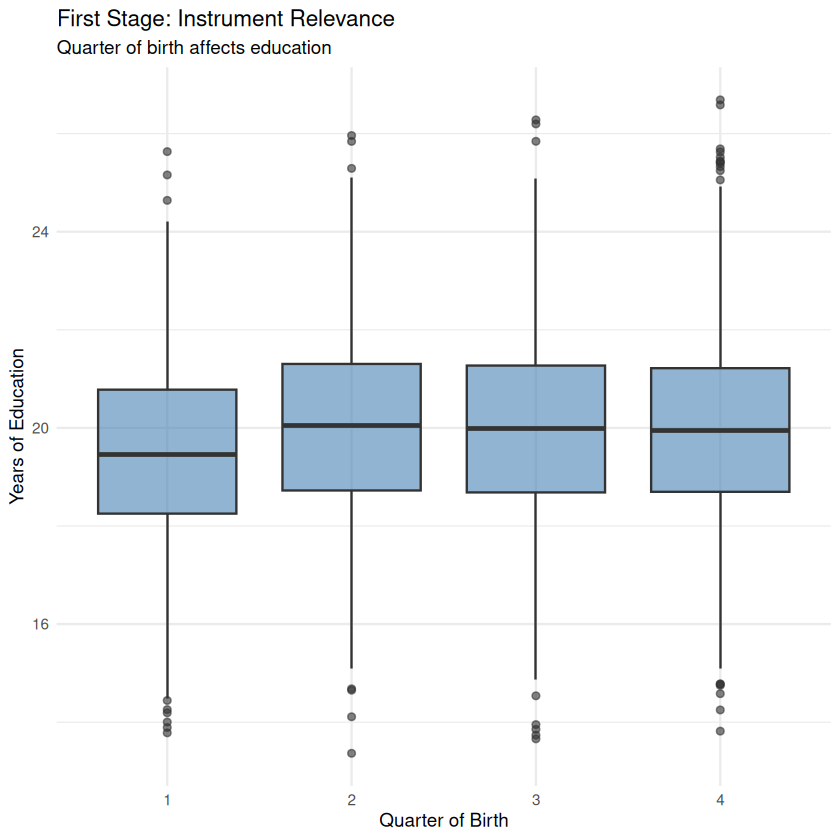

In [15]:

# ==================== 3. ORACLE REGRESSION (If we could observe ability) ====================
oracle_model <- lm(wage ~ education + ability, data = data)

cat("=== ORACLE (Controls for ability - correct) ===\n")
cat("Estimated effect:", round(coef(oracle_model)["education"], 2), "\n")
cat("True effect:", true_effect, "\n\n")

# ==================== 4. CHECK INSTRUMENT VALIDITY ====================
# Requirement 1: Relevance - Does instrument predict treatment?
first_stage <- lm(education ~ quarter_birth, data = data)
summary(first_stage)

# F-statistic should be > 10 (rule of thumb)
f_stat <- summary(first_stage)$fstatistic[1]
cat("=== First Stage F-statistic ===\n")
cat("F-stat:", round(f_stat, 2), "\n")
if (f_stat > 10) {
  cat("✓ Strong instrument (F > 10)\n\n")
} else {
  cat("✗ Weak instrument (F < 10)\n\n")
}

# Visualize first stage
ggplot(data, aes(x = factor(quarter_birth), y = education)) +
  geom_boxplot(fill = "steelblue", alpha = 0.6) +
  labs(
    title = "First Stage: Instrument Relevance",
    subtitle = "Quarter of birth affects education",
    x = "Quarter of Birth",
    y = "Years of Education"
  ) +
  theme_minimal()

# ==================== 5. IV ESTIMATION (2SLS) ====================
# Two-Stage Least Squares
iv_model <- ivreg(wage ~ education | quarter_birth, data = data)

cat("=== IV Estimation (2SLS) ===\n")
cat("Estimated effect:", round(coef(iv_model)["education"], 2), "\n")
cat("True effect:", true_effect, "\n")
cat("Standard error:", round(summary(iv_model)$coefficients["education", "Std. Error"], 2), "\n\n")

# Compare all methods
comparison <- data.frame(
  Method = c("Naive OLS", "Oracle (with ability)", "IV (2SLS)", "True Effect"),
  Estimate = c(
    coef(naive_model)["education"],
    coef(oracle_model)["education"],
    coef(iv_model)["education"],
    true_effect
  ),
  SE = c(
    summary(naive_model)$coefficients["education", "Std. Error"],
    summary(oracle_model)$coefficients["education", "Std. Error"],
    summary(iv_model)$coefficients["education", "Std. Error"],
    NA
  )
)

print(comparison)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Reduced Form: Quarter of Birth → Wages' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Reduced Form: Quarter of Birth → Wages' in 'mbcsToSbcs': dot substituted for <86>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Reduced Form: Quarter of Birth → Wages' in 'mbcsToSbcs': dot substituted for <92>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Reduced Form: Quarter of Birth → Wages' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Reduced Form:

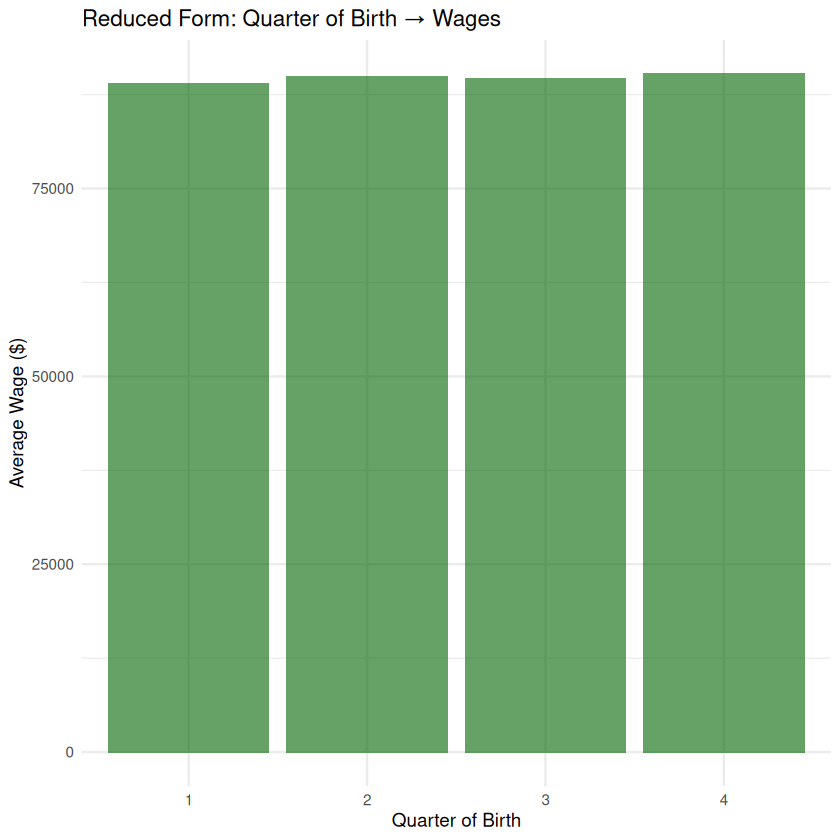

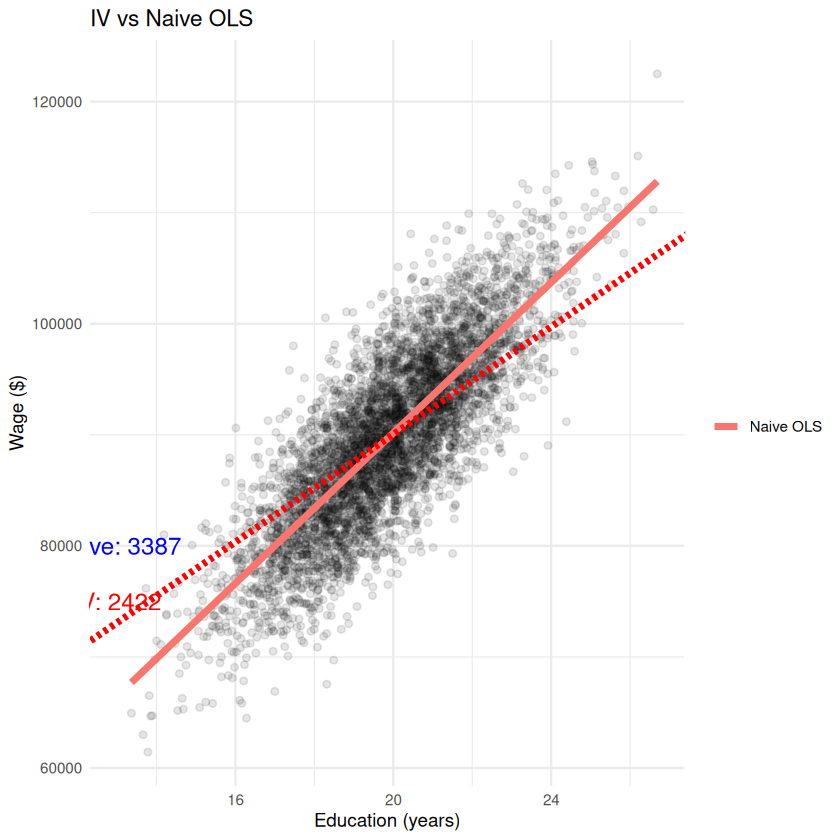

In [16]:

# ==================== 6. VISUALIZE ====================
# Create reduced form plot
reduced_form <- data %>%
  group_by(quarter_birth) %>%
  summarise(
    avg_wage = mean(wage),
    avg_education = mean(education),
    .groups = 'drop'
  )

# Plot 1: Reduced form (instrument → outcome)
p1 <- ggplot(reduced_form, aes(x = factor(quarter_birth), y = avg_wage)) +
  geom_col(fill = "darkgreen", alpha = 0.6) +
  labs(
    title = "Reduced Form: Quarter of Birth → Wages",
    x = "Quarter of Birth",
    y = "Average Wage ($)"
  ) +
  theme_minimal()

# Plot 2: IV estimate visualization
p2 <- ggplot(data, aes(x = education, y = wage)) +
  geom_point(alpha = 0.1) +
  geom_smooth(method = "lm", aes(color = "Naive OLS"), se = FALSE, size = 1.5) +
  geom_abline(intercept = coef(iv_model)[1], 
              slope = coef(iv_model)[2],
              color = "red", size = 1.5, linetype = "dashed") +
  annotate("text", x = 13, y = 80000, 
           label = paste("Naive:", round(coef(naive_model)["education"], 0)),
           color = "blue", size = 5) +
  annotate("text", x = 13, y = 75000,
           label = paste("IV:", round(coef(iv_model)["education"], 0)),
           color = "red", size = 5) +
  labs(
    title = "IV vs Naive OLS",
    x = "Education (years)",
    y = "Wage ($)",
    color = ""
  ) +
  theme_minimal()

print(p1)
print(p2)

In [17]:
cat("Manual 2SLS calculation : Claude AI")

# ==================== MANUAL 2SLS ====================
# Stage 1: Regress education on instrument
stage1 <- lm(education ~ quarter_birth, data = data)
data$education_predicted <- predict(stage1)

# Stage 2: Regress wage on predicted education
stage2 <- lm(wage ~ education_predicted, data = data)

cat("\n=== Manual 2SLS ===\n")
cat("Stage 1 coefficient:", round(coef(stage1)["quarter_birth"], 4), "\n")
cat("Stage 2 coefficient:", round(coef(stage2)["education_predicted"], 2), "\n")

# This matches ivreg() output
cat("\nCompare with ivreg:", round(coef(iv_model)["education"], 2), "\n")

Manual 2SLS calculation : Claude AI
=== Manual 2SLS ===
Stage 1 coefficient: 0.148 
Stage 2 coefficient: 2421.57 

Compare with ivreg: 2421.57 
